# Video games sales

**Project description**

>There are open-source data of video games sales, which can include users and critics ratings, genres and platforms, >for which games were developed. The aim of the project is to determine concurrent factors of successfull games sales. 


## Data overview


In [1]:
#importimg libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

try:
    games = pd.read_csv('/datasets/games.csv')
    print('Using cloud files')
    print()
except:
    games = pd.read_csv('D:/Bot/DataScience/Jupyter projects/1 module/big project/games.csv')
    print('Using local files')
    print()

games.name = 'games'
display(games.head(10)) #looking at data and summary
display(games.info())

Using local files



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

There are many missing values as well as wrong data types.

## Data preprocessing

In [2]:
#changing column names
games.columns = games.columns.str.lower()
games = games.rename(columns={'year_of_release':'release_year'}) 
display(games.columns)

Index(['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Removing duplicates

In [3]:
#prior duplicates search we lowercase every row for duplicate 
column_list_upper = ['name','platform','genre','user_score','rating']
for element in column_list_upper:
    games[element] = games[element].str.lower()
print('Дубликатов в',games.name,':',games.duplicated().sum())

Дубликатов в 0                           wii sports
1                    super mario bros.
2                       mario kart wii
3                    wii sports resort
4             pokemon red/pokemon blue
                     ...              
16710    samurai warriors: sanada maru
16711                 lma manager 2007
16712          haitaka no psychedelica
16713                 spirits & spells
16714              winning post 8 2016
Name: name, Length: 16715, dtype: object : 0


### Changind data types

#### Users rating

Column with user_score has "object" type, although it should have numbers instead, lets check.

In [4]:
games['user_score'].describe()
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

"tbd" detected. How many?

In [5]:
display(games.query('user_score == "tbd"'))

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


"tbd" - "To Be Determined", when there are not enough review for rating estimation. Let's treat that like missing values.

In [6]:
#changing to numerical
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce') #ошибки заменяем на NaN - ы
display(games['user_score'].describe())
display(games['user_score'].unique()) #проверим как получилось

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

#### Release year

In [7]:
games['release_year'] = pd.to_datetime(games['release_year'],format= '%Y') #приведем строку с датами к датам
games['release_year'] = games['release_year'].dt.year #Оставим год


### Handling missing data

In [8]:
#looking at the total gaps in rows
print('Amount of missing values:')
display(games.isna().sum())
print('Percentage of missing values:')   #showing missing info
display(games.isnull().sum()*100/len(games))

Amount of missing values:


name               2
platform           0
release_year     269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating          6766
dtype: int64

Percentage of missing values:


name             0.011965
platform         0.000000
release_year     1.609333
genre            0.011965
na_sales         0.000000
eu_sales         0.000000
jp_sales         0.000000
other_sales      0.000000
critic_score    51.319174
user_score      54.591684
rating          40.478612
dtype: float64

Will have to remove NaNs in genres and release year. Missing ratings will be replaced by marker values.


#### Name, genre, release year

In [9]:
#removing missing values
games.dropna(subset = ['name','release_year','genre'], inplace=True)


#### Ratings

In [10]:
empty_scores = ['critic_score','user_score'] #list of columns with gaps
unique_genres = games['genre'].unique() #genres list

#replacing gaps by marker value
for element in empty_scores:
    for genre in unique_genres:
        value = -1
        games.loc[games.loc[:,'genre'] == genre, element] = games.loc[games.loc[:,'genre'] == genre, element].fillna(value)


#### Age rating

Reaplacing missing values by "unknown". 


In [11]:
games['rating'] = games['rating'].fillna('unknown')

display(games.isna().sum()) #checking out

name            0
platform        0
release_year    0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
critic_score    0
user_score      0
rating          0
dtype: int64

Interesting to check how many missing ratings for eeach game category.

In [12]:

genre_rating = games.pivot_table(index='rating',columns='genre',values='name',aggfunc='count')
display(genre_rating)
genre_rating_perc = genre_rating 
column_list = list(genre_rating.columns)
for element in column_list:
    genre_rating_perc[element] = (100*genre_rating[element])/genre_rating[element].sum() #percentage for each genre
display(genre_rating_perc)

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
rating,,,,,,,,,,,,
ao,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,410.0,159.0,8.0,449.0,354.0,284.0,576.0,83.0,47.0,321.0,1162.0,68.0
e10+,468.0,67.0,19.0,166.0,141.0,42.0,95.0,111.0,56.0,47.0,105.0,76.0
ec,1.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k-a,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
m,596.0,98.0,48.0,13.0,3.0,NaN,18.0,161.0,553.0,5.0,16.0,25.0
rp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
t,670.0,114.0,357.0,228.0,63.0,10.0,167.0,415.0,340.0,186.0,195.0,160.0
unknown,1161.0,853.0,405.0,859.0,317.0,233.0,370.0,711.0,300.0,298.0,828.0,341.0


genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
rating,,,,,,,,,,,,
ao,0.030239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e,12.397944,12.296984,0.955795,26.089483,40.318907,49.912127,46.982055,5.604321,3.626543,37.456243,50.390286,10.104012
e10+,14.151799,5.181748,2.270012,9.645555,16.059226,7.381371,7.748777,7.494936,4.320988,5.484247,4.553339,11.292719
ec,0.030239,0.154679,NaN,0.290529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k-a,NaN,NaN,NaN,0.058106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297177
m,18.022377,7.579273,5.734767,0.755375,0.341686,NaN,1.468189,10.871033,42.669753,0.583431,0.693842,3.714710
rp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148588
t,20.260054,8.816705,42.652330,13.248112,7.175399,1.757469,13.621533,28.021607,26.234568,21.703617,8.456201,23.774146
unknown,35.107348,65.970611,48.387097,49.912841,36.104784,40.949033,30.179445,48.008103,23.148148,34.772462,35.906331,50.668648


### Errors search

In [13]:
#checking unique genres
display(games['genre'].sort_values().unique())

#unique platforms
display(games['platform'].sort_values().unique())

#checking dates
display(games['release_year'].sort_values().unique())


array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Duplicates and suspicious values were not found. 

## Additional calculations

#### Total sales

In [14]:
#adding column with total sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

#### Grouping by release year

In [15]:
#creating pivot table by release year
#sum up sales for each platform 
games_by_year = games.pivot_table(index=['release_year','platform'],values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],aggfunc='sum')
#calculationg amount of released games for each platform:
games_count = games.pivot_table(index=['release_year','platform'],values='name',aggfunc='count')
games_count.columns=['games_released']
games_by_year = games_by_year.merge(games_count,on=['release_year','platform'],how='outer') 
games_by_year = games_by_year.reset_index()

display(games_by_year.head(5))


,release_year,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales,games_released
0,1980.0,2600,0.67,0.0,10.59,0.12,11.38,9
1,1981.0,2600,1.96,0.0,33.40,0.32,35.68,46
2,1982.0,2600,1.65,0.0,26.92,0.31,28.88,36
3,1983.0,2600,0.34,0.0,5.44,0.06,5.84,11
4,1983.0,nes,0.46,8.1,2.32,0.08,10.96,6


#### Grouping by genre

In [16]:
#function for grouping by column
#with column and table names as arguments
#function creates pivot table, summing up sales for chosen group
#also adding total amount of released games 
def grouping(column,data):
    resulting_table = data.pivot_table(index=[column],values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],aggfunc='sum')
    counter = data.pivot_table(index=[column],values='name',aggfunc='count')
    counter.columns = ['games_released']
    resulting_table = resulting_table.merge(counter,on=[column],how='outer')
    resulting_table = resulting_table.reset_index()
    return resulting_table

In [17]:
#using function for grouping by genre
games_by_genre = grouping('genre',games)

display(games_by_genre.head(5))


,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales,games_released
0,action,510.99,160.14,863.17,182.22,1716.52,3307
1,adventure,63.20,52.24,101.52,16.37,233.33,1293
2,fighting,99.00,87.28,220.51,35.87,442.66,837
3,misc,210.60,107.02,399.57,73.10,790.29,1721
4,platform,199.39,130.71,444.44,51.01,825.55,878


#### Grouping by platform

In [18]:
games_by_platform = grouping('platform',games)
display(games_by_platform.head(5))

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales,games_released
0,2600,4.86,0.00,80.78,0.84,86.48,116
1,3do,0.00,0.10,0.00,0.00,0.10,3
2,3ds,61.27,100.62,82.65,13.27,257.81,512
3,dc,1.69,8.56,5.43,0.27,15.95,52
4,ds,188.41,175.02,380.31,59.04,802.78,2121


#### Grouping by age rating

In [19]:
games_by_ESRB = grouping('rating',games)
display(games_by_ESRB.head(5))

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales,games_released
0,ao,0.61,0.00,1.26,0.09,1.96,1
1,e,703.87,197.96,1274.24,231.54,2407.61,3921
2,e10+,183.35,40.20,345.50,71.93,640.98,1393
3,ec,0.11,0.00,1.53,0.11,1.75,8
4,k-a,0.27,1.46,2.56,0.03,4.32,3


#### Other supporting tables

In [20]:
#platforms list:
platforms = games['platform'].sort_values().unique()
#genres list:
genres = games['genre'].sort_values().unique()

## Exploratory data analysis

### Dictionaries

In [21]:
#making dictionaries for plot annotation
entity_dict = {'mean_sales':'mean_sales','total_sales':'total_sales','name':'name','platform':'platform', 'release_year':'year', 'genre':'genre', 'na_sales':'na_sales', 'eu_sales':'eu_sales', 'jp_sales':'jp_sales', 'other_sales':'other_sales', 'critic_score':'critic_score', 'user_score':'user_score', 'rating':'ESRB rating','games_released':'games' }
unit_dict = {'mean_sales':'M copies','total_sales':'M copies','name':'','platform':'', 'release_year':'', 'genre':'', 'na_sales':'M copies', 'eu_sales':'M copies', 'jp_sales':'M copies', 'other_sales':'M copies', 'critic_score':'', 'user_score':'', 'rating':'','games_released':'pc.'}

### Additional functions

In [22]:
display(games.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   release_year  16444 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  16444 non-null  float64
 9   user_score    16444 non-null  float64
 10  rating        16444 non-null  object 
 11  total_sales   16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


None

#### Functions for visualization

##### Bar charts

In [23]:
# bar chart for argument, variable, table
def bar_chart(argument,variable,data):
    x = data[argument]
    y = data[variable]
    fig,ax = plt.subplots(figsize=(12,6))
    ax.bar(x,y)
    title = variable + ' by ' + argument          #name               
    xlabel = entity_dict[argument]#axis names
    ylabel = entity_dict[variable]
    
    if unit_dict[argument] != '':   #adding unit if there is one in the dictionary
        xlabel += ', ' + unit_dict[argument] 
    if unit_dict[variable] != '':   #adding unit
        ylabel += ', ' + unit_dict[variable] 
    
    ax.set_xlabel(xlabel)    #adding axis name                               
    ax.set_ylabel(ylabel)
    ax.set_title(title)
   


In [24]:
#bar chart sorted by ascending variable
def bar_sorted(argument,variable,data):
    data = data.sort_values(by=variable) #sorting in ascending order
    x = data[argument]
    y = data[variable]
    fig,ax = plt.subplots(figsize=(12,6))
    ax.bar(x,y)
    title = variable + ' by ' + argument          #name   
    
    xlabel = entity_dict[argument]#axis names
    ylabel = entity_dict[variable]
    
    if unit_dict[argument] != '':   #units from the dicts
        xlabel += ', ' + unit_dict[argument] 
    if unit_dict[variable] != '':   #units from the dicts
        ylabel += ', ' + unit_dict[variable] 
    
    ax.set_xlabel(xlabel)    #adding axis name                              
    ax.set_ylabel(ylabel)
    ax.set_title(title)
   

##### Just plots

In [25]:
  
#plot for argument, variable, table, platform list

def tzar_plot(argument,variable,data,sub_list):
    fig,ax = plt.subplots(figsize=(10,6))
    for element in sub_list: 
    
        x = data.query('platform == @element')[argument] 
        y = data.query('platform == @element')[variable]
        ax.plot(x,y,label=element, alpha=0.8)
    
    xlabel = entity_dict[argument]#axis names
    ylabel = entity_dict[variable]
    
    if unit_dict[argument] != '':   #units from the dicts
        xlabel += ', ' + unit_dict[argument] 
    if unit_dict[variable] != '':   #units from the dicts
        ylabel += ', ' + unit_dict[variable]
        
    ax.set_xlabel(xlabel)                                    
    ax.set_ylabel(ylabel)
    
    title = variable + ' by ' + argument
    ax.set_title(title)
    
    ax.legend()
    ax.tick_params(which='major', length=5, width=2)
    ax.tick_params(which='minor', length=5, width=1)
    ax.grid(which='major', linewidth=1.2)
    ax.grid(which='minor', linestyle='--', color='gray', linewidth=0.5)
    plt.show()

##### Box plot

In [26]:
#many boxplots for variable, table, platforms list
#boxes on different subplots
def boxes(variable,data,sub_list):
    number = len(sub_list) #number of plots
    number_i = number - 1 
    rows_number = int(np.ceil(number/2)) #2 in a row
    
    rows_number_i = rows_number - 1
    height = rows_number*8
    fig,ax = plt.subplots(rows_number,2,figsize=(32,height))
    
    for i in range (0,rows_number):  #row
        for j in range (0,2):   #column
            text = sub_list[2*i+j] #name 
            ylabel = entity_dict[variable]
            if unit_dict[variable] != '':   #unit
                ylabel += ', ' + unit_dict[variable]
            
            ax[i,j].boxplot(data[data['platform'] == sub_list[2*i+j]][variable]) #making plot
            ax[i,j].set_title(text)
            ax[i,j].set_ylabel(ylabel)
           
           


#### Hypotheses check

In [27]:
#making function for hypotheses check
#function for checking hypotheses about the equality of the mean of two general populations
#getting 2 samples, text, and significance lewel
def mean_comparison(sample1,sample2,H0,alpha): 
    result = st.ttest_ind(sample1,sample2)
    print('Null hypothesis:', H0)
    print('p-value:', result.pvalue)
    if result.pvalue < alpha:
        print('There is a reason to reject the null hypothesis')
    else:
        print('There is no reason to reject the null hypothesis')

#### Mean, variance and standard deviation

In [28]:
#function for calculation of mean, variance and standard deviation
def mean_info(variable,table,group): #variable, in which table, variable for grouping
    
    grouped = table.pivot_table(index=group,values=variable) #calculating mean values for every group
    grouped = grouped.reset_index()
    grouped.columns = [group,'mean']
    
    iteration_list = table[group].unique() #list of unique groups
    dispersion = []
    for element in iteration_list: #calculating variance
        var_group = np.var(table[table[group] ==element][variable]) #variance for every group
        dispersion.append(var_group)
    grouped['variation'] = dispersion
    
    grouped['stdiv'] = np.sqrt(grouped['variation']) #adding standard deviation
    
    return grouped  #returning table with calculated values

### Identification of the relevant period for the next year prognosis

#### Amount of games by year

How many games were released in a year over the whole taken period.

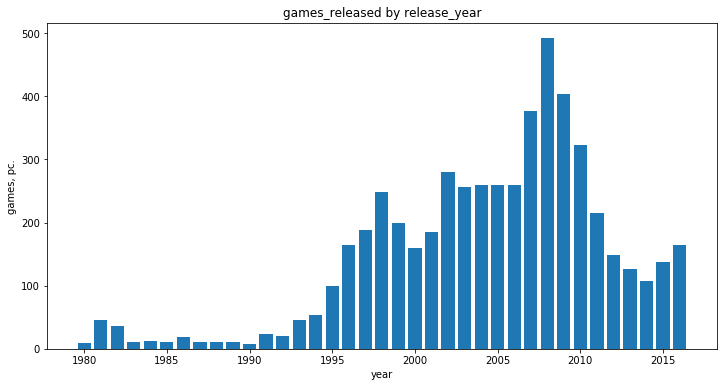

In [29]:
bar_chart('release_year','games_released',games_by_year) #from additional functions

Before 1994-95 not many games were being released every year. After 2001 till the end of 2009 the amount of released games had been increased dramatically, and then dropped again. Must probably that time mobile gaming took its place.

#### Sales change

Lets look at the sales by platform.

In [30]:
platforms_total_sales = games_by_year.pivot_table(index='platform',values=['total_sales','games_released'],aggfunc='sum')
#showing first 15 trading platforms:
display(platforms_total_sales.sort_values(by='total_sales',ascending=False).head(15))
#and descriptions of them
platforms_total_sales.describe()


,games_released,total_sales
platform,,
ps2,2127,1233.56
x360,1232,961.24
ps3,1306,931.34
wii,1286,891.18
ds,2121,802.78
ps,1190,727.58
ps4,392,314.14
gba,811,312.88
psp,1193,289.53


,games_released,total_sales
count,31.000000,31.000000
mean,530.451613,284.334516
std,617.367467,343.954144
min,1.000000,0.030000
25%,39.500000,22.150000
50%,247.000000,200.040000
75%,884.000000,301.205000
max,2127.000000,1233.560000


Lets take 25% of the best, which sales comprise more than 300M copies and follow their sales history.


C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


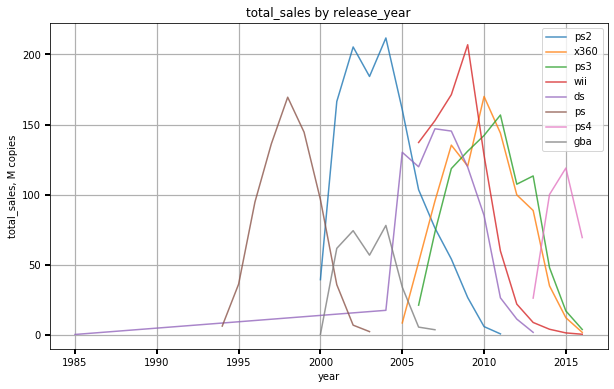

In [31]:
best_list = ['ps2','x360','ps3','wii','ds','ps','ps4','gba']
tzar_plot('release_year','total_sales',games_by_year,best_list) #function from additional functions


Most of the platforms have existed for 5 years, two of them - x360 and ps3 - about 10 years. By 2016 leaders exited the market, except ps4. Lets look at sales after 2013, when new platforms appeared.

In [32]:
after_2013 = games_by_year.query('release_year >= 2013') #chosing dates after 2013
games_after_2013 = games.query('release_year >= 2013')
after_2013_platforms = after_2013['platform'].sort_values().unique() #list of platforms after 2013
display(after_2013.head(5))

,release_year,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales,games_released
198,2013.0,3ds,14.84,23.57,15.56,2.60,56.57,91
199,2013.0,ds,0.85,0.00,0.57,0.12,1.54,8
200,2013.0,pc,7.39,0.00,3.88,1.11,12.38,38
201,2013.0,ps3,42.27,12.13,41.45,17.40,113.25,126
202,2013.0,ps4,11.05,0.94,10.13,3.87,25.99,16


### Defining leaders among platforms

C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


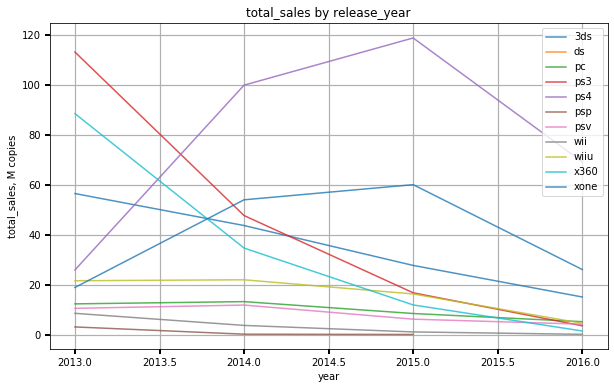

,platform,games_released,total_sales
4,ps4,392,314.14
3,ps3,345,181.43
10,xone,247,159.32
0,3ds,303,143.25
9,x360,186,136.80
8,wiiu,115,64.63
2,pc,189,39.43
6,psv,358,32.99
7,wii,23,13.66
5,psp,67,3.50


In [34]:
tzar_plot('release_year','total_sales',after_2013,after_2013_platforms)
sales_by_platform_2013 = after_2013.pivot_table(index='platform',values=['total_sales','games_released'],aggfunc='sum')
sales_by_platform_2013 = sales_by_platform_2013.reset_index()
display(sales_by_platform_2013.sort_values(by='total_sales',ascending=False))

C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


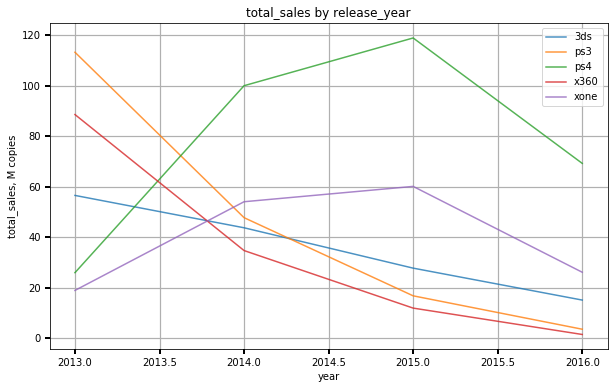

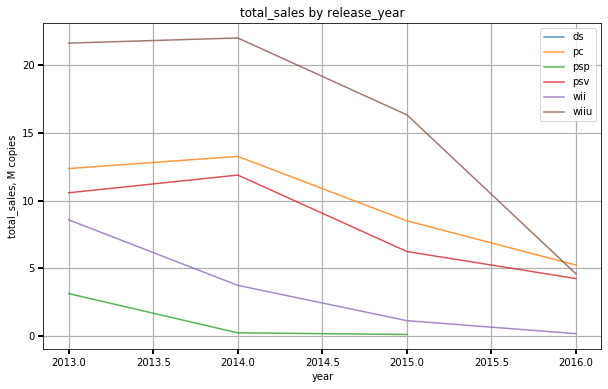

In [35]:
#lets devide plots 
group_1 = sales_by_platform_2013[sales_by_platform_2013['total_sales'] > 100]['platform']
group_2 = sales_by_platform_2013[(sales_by_platform_2013['total_sales'] < 100)]['platform']

tzar_plot('release_year','total_sales',after_2013,group_1)
tzar_plot('release_year','total_sales',after_2013,group_2)


By 2015 all sales have decreased. Only ps4,xone and 3ds sales in recent years show better results. PC sales are more or less stable during the long period.

### Box-plots for global sales after 2013

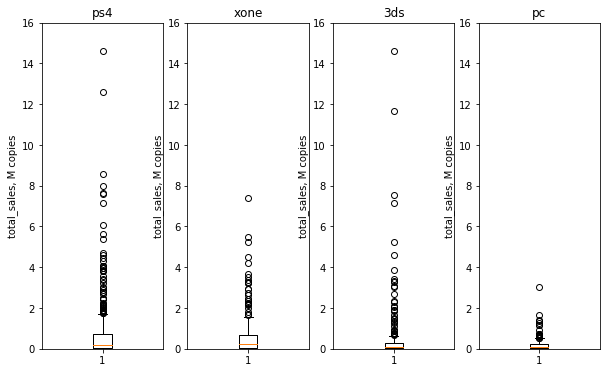

In [36]:
#making box-plots for chosen platforms
pl=['ps4','xone','3ds','pc']
fig,ax = plt.subplots(1,4,figsize=(10,6))
   
ylabel = entity_dict['total_sales'] + ', ' + unit_dict['total_sales']
for i in range (0,4):
    text = pl[i]
    ax[i].boxplot(games_after_2013[games_after_2013['platform'] == pl[i]]['total_sales']) 
    ax[i].set_title(text)
    ax[i].set_ylabel(ylabel)        
    ax[i].set_ylim(0,16)      

### Influence of ratings on the example of ps4

,release_year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
release_year,1.000000,-0.264593,-0.194378,-0.126683,-0.235330,-0.021142,0.092788,-0.237611
na_sales,-0.264593,1.000000,0.715813,0.531527,0.915598,0.415008,0.012087,0.894186
eu_sales,-0.194378,0.715813,1.000000,0.520915,0.935284,0.346720,-0.018208,0.951760
jp_sales,-0.126683,0.531527,0.520915,1.000000,0.567749,0.322358,0.173069,0.593180
other_sales,-0.235330,0.915598,0.935284,0.567749,1.000000,0.409191,-0.001810,0.997804
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.496739,0.406568
user_score,0.092788,0.012087,-0.018208,0.173069,-0.001810,0.496739,1.000000,0.001260
total_sales,-0.237611,0.894186,0.951760,0.593180,0.997804,0.406568,0.001260,1.000000


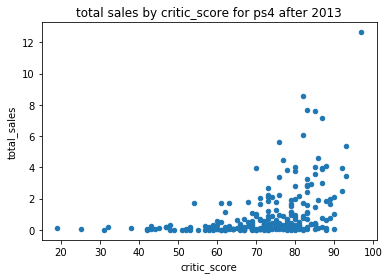

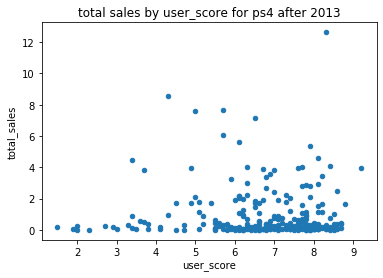

In [37]:
#chosing ps4 data:
ps4_critic = games_after_2013.query('(platform == "ps4")&(critic_score >=0)') #chosing existing ratings
ps4_user = games_after_2013.query('(platform == "ps4")&(user_score >=0)')
display(ps4_critic.corr()) #correlation table
ps4_critic.plot(x='critic_score',y='total_sales',kind='scatter') #scatter plot
plt.title('total sales by critic_score for ps4 after 2013')
plt.show()
ps4_user.plot(x='user_score',y='total_sales',kind='scatter') #scatter plot for users rating
plt.title('total sales by user_score for ps4 after 2013')
plt.show()

- Global sales of ps4 show weak correlation with critics ratings and weaker with users ratings.

#### Comparison with other platforms

In [38]:
#platforms list with sales after 2013:
platforms_2013 = games_after_2013['platform'].unique()
d = {'platform':platforms_2013} #dictionary for rows and cols with correlations
platforms_score_corr = pd.DataFrame(data=d) #getting together table based on dictionry
platforms_score_corr.name = 'Корреляция глобальных продаж с отзывами'

#mking function for calculation of correlation between global sales and ratings
def fill_corr(name):
    query = games_after_2013[(games_after_2013['platform']==name)&(games_after_2013[variable]>=0)] #chosing platform and positive rating
    corr = query['total_sales'].corr(query[variable]) 
    return corr
for element in ['critic_score','user_score']:
    variable = element 
    platforms_score_corr[element] = platforms_score_corr['platform'].apply(fill_corr)
print(platforms_score_corr.name)
display(platforms_score_corr)

Корреляция глобальных продаж с отзывами


C:\Users\Anastasia\anaconda3\envs\praktikum_env\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


,platform,critic_score,user_score
0,ps3,0.334285,0.002394
1,x360,0.350345,-0.011742
2,ps4,0.406568,-0.031957
3,3ds,0.357057,0.241504
4,xone,0.416998,-0.068925
5,wiiu,0.376415,0.419330
6,wii,NaN,0.682942
7,pc,0.196030,-0.093842
8,psv,0.254742,0.000942
9,ds,NaN,NaN


In [39]:
display(games_after_2013.query('(platform =="wii")')['critic_score'].describe()) #проверям, почему появились NaN

count    23.0
mean     -1.0
std       0.0
min      -1.0
25%      -1.0
50%      -1.0
75%      -1.0
max      -1.0
Name: critic_score, dtype: float64

Correlation of ratings and global sales varies for each platform.

### Games distribution by genre

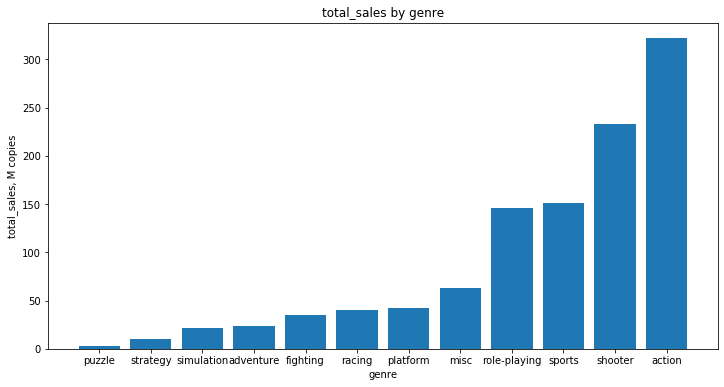

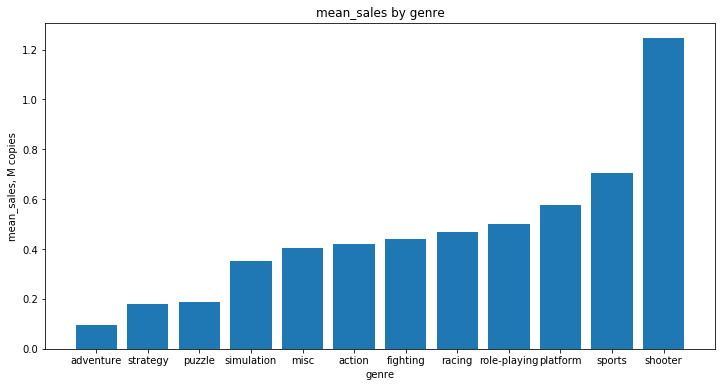

In [40]:
games_by_genre_2013 = grouping('genre',games_after_2013) #grouping by genre with function from additional functions
games_by_genre_2013 = games_by_genre_2013.sort_values(by='total_sales') 
games_by_genre_2013['mean_sales'] = games_by_genre_2013['total_sales']/games_by_genre_2013['games_released']
bar_chart('genre','total_sales',games_by_genre_2013)
bar_sorted('genre','mean_sales',games_by_genre_2013)

Sales of some genres differ dramatically: action games are being sold much more often than strategies. Total sales depict best-selling genres, while mean sales show games of which genre have the biggest sales. Mean sales are more informative, when we want to chose certain game, not the genre.

## Differences between regions

### Popular platforms

In [41]:
games_by_platform_2013 = grouping('platform',games_after_2013) #grouping by platform

na_platforms = games_by_platform_2013.loc[:,['platform','na_sales']]
eu_platforms = games_by_platform_2013.loc[:,['platform','eu_sales']]
jp_platforms = games_by_platform_2013.loc[:,['platform','jp_sales']]

na_top5 = na_platforms.sort_values(by='na_sales',ascending=False).head(5) #table with top-5
na_top5 = na_top5.reset_index(drop=True) 

eu_top5 = eu_platforms.sort_values(by='eu_sales',ascending=False).head(5)
eu_top5 = eu_top5.reset_index(drop=True)

jp_top5 = jp_platforms.sort_values(by='jp_sales',ascending=False).head(5)
jp_top5 = jp_top5.reset_index(drop=True)

top5_regions = ['top-5 na','top-5 eu','top-5 jp'] 
top5_platforms = pd.concat([na_top5,eu_top5,jp_top5],axis=1,)
top5_platforms.columns=pd.MultiIndex.from_product([top5_regions, ['platform', 'sales']])
print('The most popular platforms in regions:')
display(top5_platforms)

The most popular platforms in regions:


top-5 na         top-5 eu         top-5 jp       
  platform   sales platform   sales platform  sales
0      ps4  108.74      ps4  141.09      3ds  67.81
1     xone   93.12      ps3   67.81      ps3  23.35
2     x360   81.66     xone   51.59      psv  18.59
3      ps3   63.50     x360   42.52      ps4  15.96
4      3ds   38.20      3ds   30.96     wiiu  10.88

### Popular genres

In [42]:
na_genres = games_by_genre_2013.loc[:,['genre','na_sales']]
eu_genres = games_by_genre_2013.loc[:,['genre','eu_sales']]
jp_genres = games_by_genre_2013.loc[:,['genre','jp_sales']]

na_genres_top = na_genres.sort_values(by='na_sales',ascending=False).head(5).reset_index(drop=True)
eu_genres_top = eu_genres.sort_values(by='eu_sales',ascending=False).head(5).reset_index(drop=True)
jp_genres_top = jp_genres.sort_values(by='jp_sales',ascending=False).head(5).reset_index(drop=True)

top5_genres = pd.concat([na_genres_top,eu_genres_top,jp_genres_top],axis=1,) 
top5_genres.columns=pd.MultiIndex.from_product([top5_regions, ['genre', 'sales']])
print('The most popular genres in regions:')
display(top5_genres)



The most popular genres in regions:


top-5 na              top-5 eu              top-5 jp       
          genre   sales         genre   sales         genre  sales
0        action  126.05        action  118.13  role-playing  51.04
1       shooter  109.74       shooter   87.86        action  40.49
2        sports   65.27        sports   60.52          misc   9.20
3  role-playing   46.40  role-playing   36.97      fighting   7.65
4          misc   27.49        racing   20.19       shooter   6.61

### Influence of age rating on sales in regions


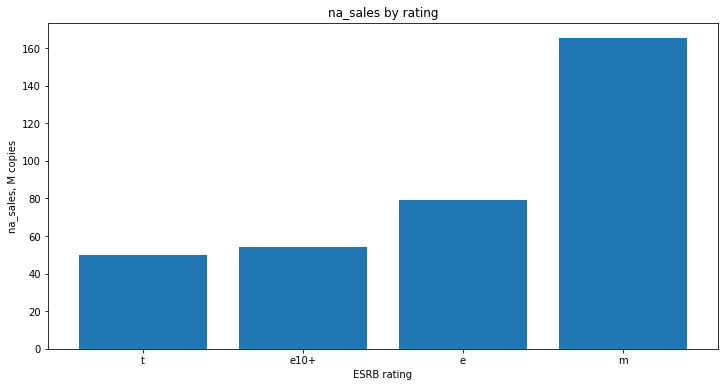

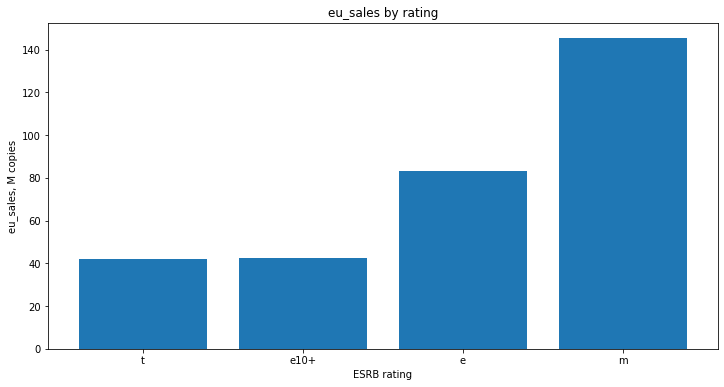

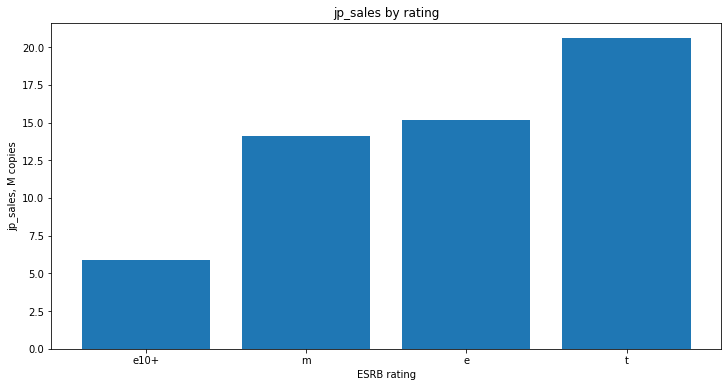

In [43]:
#making boxplots for region sales by rating
regions = ['na_sales','eu_sales','jp_sales']
games_by_ESRB_2013 = grouping('rating',games_after_2013)
games_by_ESRB_2013 = games_by_ESRB_2013.query('rating !="unknown"') #excluding unknown ratings
for element in regions:
    bar_sorted('rating',element,games_by_ESRB_2013)

## Hypotheses check

### Comparison of user ratings for XboxOne and PC

In [44]:
#mean ratings of platforms
print('Mean users rating of the game among platforms:')
xone_pc_list = ['xone','pc'] #platform list
xone_pc = mean_info('user_score',games_after_2013.query('user_score >= 0'),'platform') #function for mean, variance and standard deviation
                                                             
display(xone_pc.query('platform in @xone_pc_list'))

Mean users rating of the game among platforms:


,platform,mean,variation,stdiv
2,pc,6.269677,2.121797,1.456639
10,xone,6.521429,6.002500,2.450000


In [45]:
#checking assumption about equality of the mean ratings for xone and pc 
xone_scores = games_after_2013.query('(platform == "xone")&(user_score >= 0)')['user_score']
pc_scores = games_after_2013.query('(platform == "pc")&(user_score >= 0)')['user_score']
H1 = 'Mean users ratings of XboxOne and PC are the same' #Null hypothesis
alpha = 0.01 #significance level
mean_comparison(xone_scores,pc_scores,H1,alpha) 

Null hypothesis: Mean users ratings of XboxOne and PC are the same
p-value: 0.14012658403611647
There is no reason to reject the null hypothesis


### Comparison of genres "Action" and "Sports"

In [46]:
#mean ratings of these genres
action_sports_list = ['action','sports']
action_sports = mean_info('user_score',games_after_2013.query('user_score >= 0'),'genre')
display(action_sports.query('genre in @action_sports_list'))

,genre,mean,variation,stdiv
0,action,6.837532,1.764812,1.328462
10,sports,5.238125,1.660364,1.288551


In [47]:
#checking assumption about equality of means
action_scores = games_after_2013.query('(genre == "action")&(user_score >= 0)')['user_score']
sport_scores = games_after_2013.query('(genre == "sports")&(user_score >= 0)')['user_score']
H2 = 'Mean users ratings of genres "Action" and "Sports" are the same'
mean_comparison(action_scores,sport_scores,H2,alpha) 

Null hypothesis: Mean users ratings of genres "Action" and "Sports" are the same
p-value: 1.0517832389140023e-27
There is a reason to reject the null hypothesis


## Results and discussion

 **For "actual" period from 2013**
 
 - top-5 genres are:
  - action
  - shooter
  - sports
  - role-playing
  - misc
 - despite "action" genre being very popular(a lot of low-selling games), "shooter" games themselves on average are more popular  
 <br>
 
 - popular genres pattern differs slightly in different regions: in Japan role-playing games are the most popular, while in Europe and America they are at the 4th place. The most popular in America and Europe "actions" are at the 2nd place in Japan, "shooters" are 5th in Japan instead of 2nd in Europe and America
<br>

 - during the last 3 years sales of ps4 and xone have not yet decreased to a minimum and could be considered as potentially more profitable than older ones
 - ps4 is the most popular platform in North America and Europe, 4th in Japan;  xone is not in the top-5 in Japan, but on 2d place in America and on 3d in Europe 
 - sales within platfors have correlates with ratings in a different rate, but mostly users ratings have weaker correlation with sales than critics ratings 
  - ps4 and xone sales have weak correleation with critics ratings and weaker with users ratings
  - xone sales have weak correlation with critics rating and no correlation with users rating
     
 <br>  
 
 - in 2013 gamers got older and in every region games of "e" category (everyone) shifted to the 2nd place; in Europe and North America games for adult with rating "m" (mature) came on the 1st place;in Japan games for teenagers - "t" are at the 1st place 
  <br>
    Moreover, one should consider that missing age rating data distributet not uniformly among genres and platforms, which could mean, that real differences can vary. 